# Create a Random Forest to determine the Feature Importance

### Import Statements and Read in Data

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

with open('final_fixed_match_dates_and_scores.pkl', 'rb') as f:
    results, match_dates = pickle.load(f)
    
#Full match Data
home_df = pd.read_csv('NN/NN_home.csv', index_col=0)
away_df = pd.read_csv('NN/NN_away.csv', index_col=0)

### Read in and Format Data

In [7]:
X = []
y = []

#For each date where a game was played
for date in match_dates:

    #For each match played that day
    for result in results[date]:
        
        #Try to get the specific team from the specific match's data
        try:
            data = home_df.loc[result[0]+'_'+str(date), :]
            #Remove 'N' and 'n' which stand for NA but were given as strings from the data source
            data = [0 if elem =='N' or elem == 'n' else elem for elem in data]
            #If the data is not complete, ignore it
            if(len(data) == 10):
                X.append(data)
                y.append(float(result[3][0]))
            #The above was home data, below is away data
            data = away_df.loc[result[1]+'_'+str(date), :]
            #Remove 'N' and 'n' which stand for NA but were given as strings from the data source
            data = [0 if elem =='N' or elem == 'n' else elem for elem in data]
            if(len(data) == 10):
                X.append(data)
                y.append(float(result[3][1]))
        except:
            pass
        

#Convert to numpy array and remove missing elements
X = np.asarray(X, dtype='float64')
X = np.nan_to_num(X)

#Sanity Check
print(len(X), len(y))

10775 10775


### Perform Random Forests

In [24]:
#Create and fit the Classifier
clf = RandomForestClassifier(max_depth=6, random_state=0)

clf.fit(X, y)
print(clf.score(X,y))

0.4056612529


### Display results

In [25]:
#List of Features
features = ['BallPossession','ShotsonGoal','ShotsoffGoal','BlockedShots','FreeKicks','CornerKicks','Offsides','Throw-in','GoalkeeperSaves','Fouls']

#List of Importances
importances = clf.feature_importances_

#Display pairs
for f, i in zip(features, importances):
    print(f, i)


BallPossession 0.173606999674
ShotsonGoal 0.517127983586
ShotsoffGoal 0.0420442676644
BlockedShots 0.0255582080614
FreeKicks 0.0416153445094
CornerKicks 0.0527849517106
Offsides 0.0269291423134
Throw-in 0.0474454775898
GoalkeeperSaves 0.0311751746696
Fouls 0.0417124502217


### Graph Explained Variance Ratios

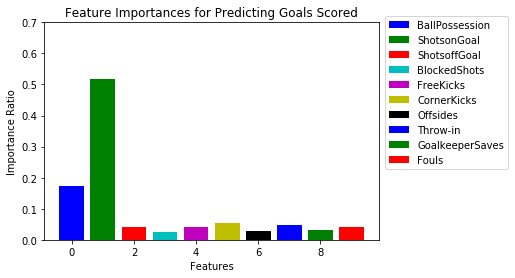

In [26]:
#More than enough colors!
COLORS = 'bgrcmykbgrcmykbgrcmyk'

#For every label add a bar
for i, label in enumerate(features):
        plt.bar(i, importances[i], label = label, color = COLORS[i])

#Graph bells and whistles
plt.title("Feature Importances for Predicting Goals Scored")
plt.xlabel('Features')
plt.ylabel('Importance Ratio')
plt.ylim((0, .7))
plt.legend(bbox_to_anchor=(1.4, 1.05))

#Display!
plt.show()

In [27]:
#Which features have an importance of more than 1%?
print("These features have an importance of the average or more for 16 features:\n")
for f, i in zip(features, importances):
    if(i*100 >= (100/10)):
        print(f,"=", i*100)

These features have an importance of the average or more for 16 features:

BallPossession = 17.3606999674
ShotsonGoal = 51.7127983586
